<a href="https://colab.research.google.com/github/iremyuvali/ml-tasks/blob/main/task2_iremyuvali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**irem** **yuvali** | **2017555071**

link : [chefboost decision tree framework from github](https://github.com/serengil/chefboost)

link: [Play Tennis dataset from kaggle](https://www.kaggle.com/datasets/tareqjoy/trainplaytennis)

In [ ]:
!pip install chefboost

In [ ]:
import pandas as pd
import numpy as np
from chefboost import Chefboost as chef

In [ ]:
data=pd.read_csv("PlayTennis.csv")
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
data.describe()

,Outlook,Temperature,Humidity,Wind,Play Tennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [ ]:
type_ = {"algorithm":"ID3"}
id3 = chef.fit(data, type_, target_label="Play Tennis")

[INFO]:  1 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  0.7775321006774902  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [ ]:
numeric_data = pd.read_csv("PlayTennis_numeric.csv")
numeric_data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,35,High,Weak,No
1,Sunny,30,High,Strong,No
2,Overcast,25,High,Weak,Yes
3,Rain,19,High,Weak,Yes
4,Rain,14,Normal,Weak,Yes
5,Rain,8,Normal,Strong,No
6,Overcast,17,Normal,Strong,Yes
7,Sunny,20,High,Weak,No
8,Sunny,10,Normal,Weak,Yes
9,Rain,16,Normal,Weak,Yes


In [ ]:
numeric_data.describe()

,Temperature
count,14.000000
mean,19.071429
std,7.888300
min,8.000000
25%,14.000000
50%,18.000000
75%,23.750000
max,35.000000


In [ ]:
type_ = {"algorithm":"C4.5"}
c45 = chef.fit(numeric_data, type_, target_label="Play Tennis")

[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.5818521976470947  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [ ]:
for i, sample in data.iterrows():
  pre = chef.predict(id3,sample)
  original=sample["Play Tennis"]
  print(pre,"--",original)

No -- No
No -- No
Yes -- Yes
Yes -- Yes
Yes -- Yes
No -- No
Yes -- Yes
No -- No
Yes -- Yes
Yes -- Yes
Yes -- Yes
Yes -- Yes
Yes -- Yes
No -- No


In [ ]:
for i, sample in numeric_data.iterrows():
  pre = chef.predict(c45,sample)
  original=sample["Play Tennis"]
  print(pre,"--",original)

No -- No
No -- No
Yes -- Yes
Yes -- Yes
Yes -- Yes
No -- No
Yes -- Yes
No -- No
Yes -- Yes
Yes -- Yes
Yes -- Yes
Yes -- Yes
Yes -- Yes
No -- No


# **with using sklearn**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['Outlook'] = Le.fit_transform(data['Outlook'])
data['Temperature'] = Le.fit_transform(data['Temperature'])
data['Humidity'] = Le.fit_transform(data['Humidity'])
data['Wind'] = Le.fit_transform(data['Wind'])
data['Play Tennis'] = Le.fit_transform(data['Play Tennis'])

data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

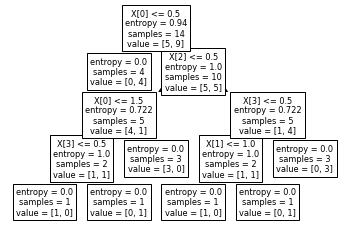

In [ ]:
y = data['Play Tennis']
X = data.drop(['Play Tennis'],axis=1)

import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

tree.plot_tree(clf)

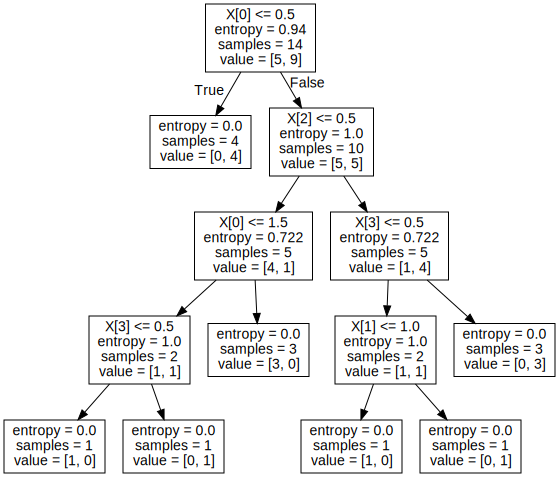

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
X_pred = clf.predict(X)

X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Play Tennis, dtype: bool